In [2]:
#Defining signals ( t ) and independent variable t
#t=seq ( 0 , 1 0 0 , 0 . 0 1 )
#s=0.4* cos ( 3 . 5 * t )+0.9* cos (4* t )
#Pl o t t ing s i g n a l s ( t )
#pl o t ( t , s , type=" l ")
import numpy as np
import matplotlib.pyplot as plt

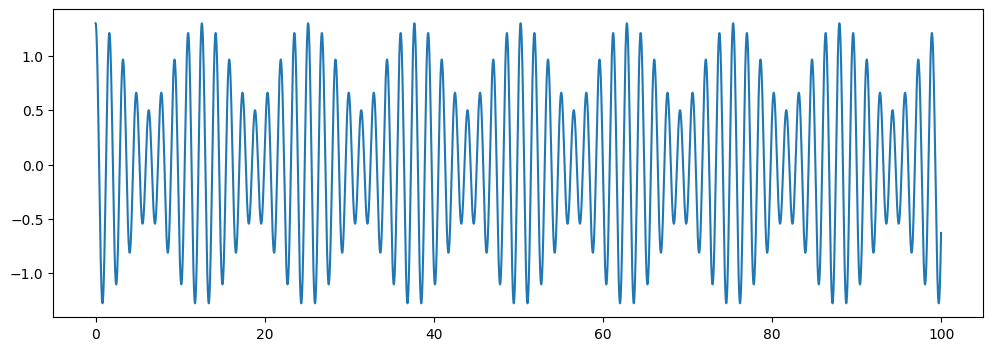

In [4]:
t = np.arange(0,100,0.01)
s = 0.4*np.cos(3.5*t) + 0.9*np.cos(4*t)

plt.figure(figsize=(12, 4))
plt.plot(t, s)
plt.show()

# Implementação da FFT (Fast Fourier Transform)

In [16]:
z = np.fft.fft(s)
z[0] = 0
#z[5000:10000] = np.zeros(5000)
w = np.fft.ifft(z) / np.size(t)     #transformada inversa

amp = 2*np.abs(w)
fase = np.arctan2(np.imag(w), np.real(w))

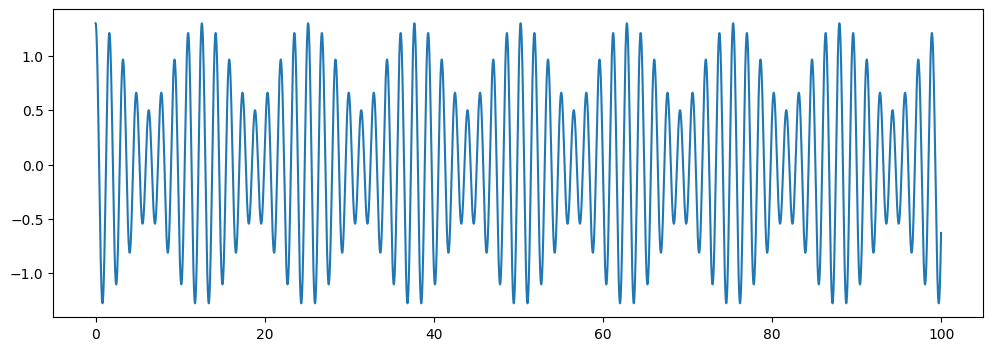

In [18]:
plt.figure(1, figsize=(12, 4))
#plt.plot(t, amp)
#plt.plot(t, s)
#plt.plot(t, w)
#plt.plot(t, fase)
plt.plot(t, s)


plt.show()